In [1]:
%matplotlib widget
import pyvisa
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.optimize import curve_fit


import sys 
sys.path.insert(0, r'C:\Users\oper\SynologyDrive\Lab2023\KIDs\QTLab2324\PAandQubit\Actual_Work')
sys.path.insert(1, r'C:\Users\oper\SynologyDrive\Lab2023\KIDs\QTLab2324\PAandQubit\Instruments\network\RS_Signal_Generator')
sys.path.insert(2, r'C:\Users\oper\SynologyDrive\Lab2023\KIDs\QTLab2324\PAandQubit\Instruments\network\VNA')

import FunFit as FF
import Tuls as Ts
import RS_SMA100B
import NA_N9916A

ip_sg           = '192.168.40.15' 
ip_vna          = '192.168.40.10' 
vna             = NA_N9916A.N9916A(ip = ip_vna)
sGen            = RS_SMA100B.SMA100B(ip = ip_sg)

N9916A:	Connection successful!
SMA100B:	Connection successful!


In [6]:
f0 = vna.get_freqs()
f0 = np.mean(np.array([int(i) for i in f0.split(',')]))

mode        = 'NA'              
s_par       = 'S21'       
f_span      = 1
f_center    = f0
bw          = 10e3            # IF BANDWIDTH
n_avgs      = 1
n_pts       = 600 
power_lvl   = -40  
                            
###############################

vna.set_num_pts(n_pts)
vna.set_freq_bandwidth(bw)
vna.set_freq_span(f_span)
vna.set_freq_center(f_center)
vna.num_avgs(n_avgs)
vna.power = power_lvl
vna.set_scaling(auto = True)

99%

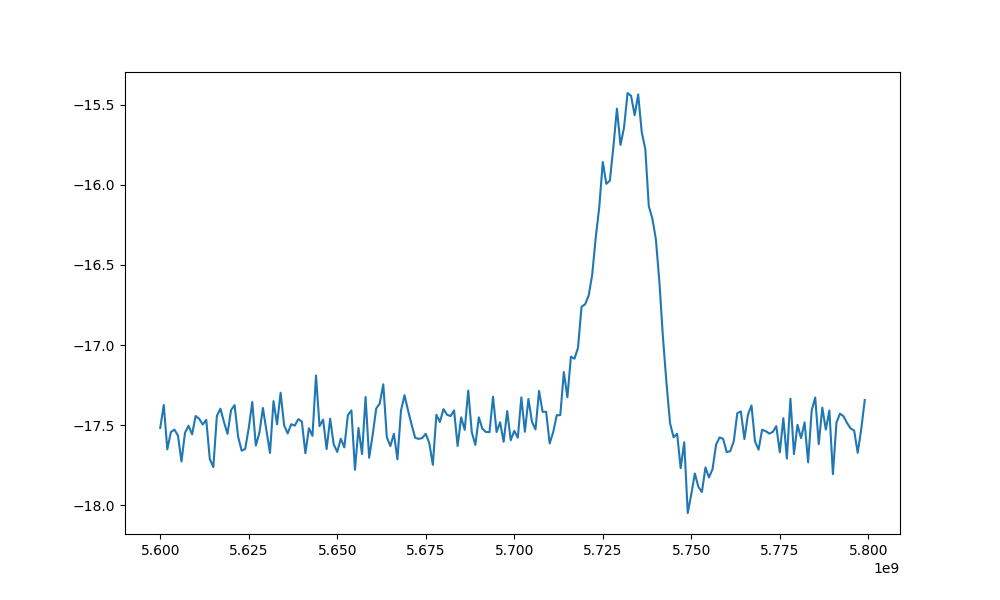

In [13]:
f_sg_min = 5.6e9
f_sg_max = 5.8e9
lvl_sg   = -40
step     = 1e6

freqs_sg = np.arange(f_sg_min, f_sg_max, step)
sGen.RF_state(1)
sGen.RF_lvl_ampl(lvl_sg)

amplitude = []
counter = 0

for f in freqs_sg:
    print(f'\r{int(counter*100/len(freqs_sg))}%', end='', flush = True)
    counter += 1
    sGen.RF_freq(f)
    time.sleep(1)
    data = vna.get_data()
    amp = np.mean(5*np.log10(data['Q']**2 + data['I']**2))
    amplitude.append(amp)

sGen.RF_state(0)
amplitude = np.array(amplitude)

fig = plt.figure(figsize = (10,6))
plt.plot(freqs_sg, amplitude)
plt.show()

# ATTENZIONE: LO SWEEP RAPPRESENTATO SUL VNA E' IN MODULO DB non DBM

In [15]:
dict = {'q_spec': amplitude,
        'f_range': freqs_sg,
        'parameters': 'attenuatore: 10dBm\natt_power_combiner:  3.4dBm\nfreq_dressed:   7579037687Hz\npower_vna:    -40dBm\npower_sg:   -40dBm'
}
Ts.save_dict_to_hdf5(data = dict, hdf5_file = 'q_spec_200624_(-40dBm+att).h5')

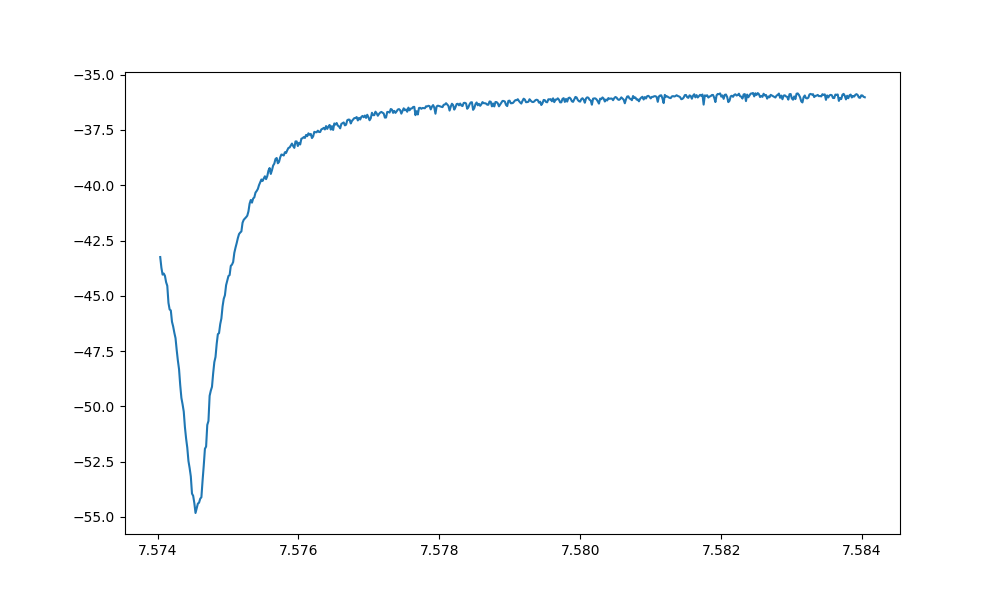

In [16]:
data = vna.get_data()
fig2 = plt.figure(figsize = (10,6))
plt.plot(data['f'], 10*np.log10(data['Q']**2 + data['I']**2)-13) # L'ATTENUAZIONE E' SOTTRATTA AL MODULO IN DB. IL VNA RAPPRESENTA IL MODULO IN DB 
plt.show()

2dbm: 5.429 GHz

2dbm: 5.539 GHz

2dbm: 5.649 GHz

-10dbm: 5.729 GHz
